# ESG Score Prediction

## Notebook Outline :

1. Introduction (ESG Score, Calculation method, Factors - Summary based on the TR pdf)
2. Data Explanation (Features - what they are)
3. Data Processing - Outlier Detection, Feature Transformation 
4. EDA - Basic Insights
6. Feature Selection/Importance
5. Data Modelling

# Introduction

### ESG Score

Environmental, social and governance score is a way of measuring important parameters of a company to evaluate its sustainibility. It is available in both percentages and letter grades (D- to A+). Thomas Reuters ESG scores was designed to measure a company's ESG performance based on several themes such as emissions, environmental
product innovation, human rights, shareholders, etc. This uses publicly available data from around 6000 public companies and around 400 ESG metrics. 

### Factors 

The ESG score is based on a number of different factors.
<br> • Environmental factors include resource use, emissions, innovations, etc. 
<br> • Social factors include workforce, human rights, community etc. 
<br> • Governance factors include management, share holders, CSR strategy etc. 

### Calculation Method

The calculation of the overall ESG score is based on two kinds of ESG scores.


Thomas Reuters ESG score - Out of publicly reported company data, 400 ESG measures are calculatd. Out of this, 178 data points are selected for the scoring process. It is then grouped into 10 categories. 

Thomas Reuters ESG Controversy score - The controversy category score is based on a list of 23 controversy topics. It is a comprehensive measure of the company's ESG performance relative to negative media stories captured from global media. 

The ESG Score Calculation Methodology:

Percentile Rank Method is used to calculate the scores. It is based on three factors:
<br> • How many companies have the same value?
<br> • How many companies have a value at all?
<br> • How many companies are worse than the current one?



$$ Score = \frac{\text{No. of companies with a worst value} + \frac{\text{No. of companies with the same value included the current one}}{2}}{\text{No. of companies with a value}} $$



TODO :
1. Figure out Return and MC data values 
2. P/E Daily time series ration - what does this column mean? - Karthik
3. Read about KNN Imputation 
4. Null values and outlier 

'Total Current Assets', 'Total Current Liabilities', 'Total Debt', 'Total Assets, Reported' - Dev

'P/E (Daily Time Series Ratio)','CO2 Emissions','Total Revenue', 'Total Equity' - Karthik

 'Net Income - Actual','Revenue Per Share','Company Market Capitalization', 'PPE Total', - Sush

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_firm = pd.read_csv("Firm_Data.csv")

In [3]:
df_firm.head(20)

,RIC,Date,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,Total CO2 Equivalent Emissions To Revenues USD in million,ESG Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Company Market Capitalization,"Property Plant And Equipment, Total - Gross",P/E (Daily Time Series Ratio)
0,BVIC.L,31/12/2009,434.373405,483.824655,718.957376,1361.504594,107.309409,7.068281,1561.383359,-3.988004,NaN,51.267135,45.539754,59.077651,53.535053,1430.561330,817.381317,19.299905
1,BVIC.L,31/12/2010,579.778906,580.095207,901.298414,1655.358922,139.656087,8.006665,1800.699024,-48.552134,NaN,50.550242,57.622888,31.890959,55.261467,1772.376566,889.120843,16.927900
2,BVIC.L,31/12/2011,598.968478,607.694345,893.154869,1660.096296,122.255528,7.912984,2010.689188,35.059289,NaN,46.732870,57.397993,28.924942,45.229496,1205.126197,836.280911,13.534436
3,BVIC.L,31/12/2012,615.523874,601.137943,907.121844,1658.099764,100.765756,7.914423,2030.840850,59.968319,NaN,57.941343,70.633040,37.216902,55.762859,1603.272359,872.046035,18.363571
4,BVIC.L,31/12/2013,748.229068,814.064189,895.874010,1714.940377,133.919162,8.716901,2133.025672,65.996482,31.296503,49.513243,52.778937,33.146107,58.148148,2819.919676,907.653333,27.421399
5,BVIC.L,31/12/2014,828.662865,705.524961,916.711341,1790.210699,157.742654,8.824210,2183.992072,134.996832,27.779129,56.486561,51.956458,53.173608,66.189318,2600.057241,923.534285,18.651145
6,BVIC.L,31/12/2015,958.070197,697.413165,877.611125,1972.158125,174.101133,7.841383,1973.676221,321.532669,30.711131,71.533697,70.562749,61.699281,81.216931,2810.455180,901.445227,17.698577
7,BVIC.L,31/12/2016,937.577039,1011.275318,1014.648830,2120.642005,161.302423,7.055922,1857.118761,364.598876,37.880026,54.877377,45.421212,66.527985,59.659234,1839.323904,1153.222353,13.027894
8,BVIC.L,31/12/2017,766.252729,827.606532,900.748838,2160.779113,186.478624,7.250479,1916.301625,454.527187,35.135417,68.473164,70.109455,56.919381,75.593852,2906.107284,1256.815229,19.312796
9,BVIC.L,31/12/2018,848.120066,910.393705,1001.980250,2293.441726,189.832937,7.380873,1958.883765,491.544855,31.206958,63.609177,66.475517,40.414673,78.545530,2701.676442,1314.911801,18.140770


In [4]:
df_firm.shape

(24479, 18)

In [5]:
df_firm.columns

Index(['RIC', 'Date', 'Total Current Assets', 'Total Current Liabilities',
       'Total Debt', 'Total Assets, Reported', 'Net Income - Actual',
       'Revenue Per Share', 'Total Revenue', 'Total Equity',
       'Total CO2 Equivalent Emissions To Revenues USD in million',
       'ESG Score', 'Social Pillar Score', 'Governance Pillar Score',
       'Environmental Pillar Score', 'Company Market Capitalization',
       'Property Plant And Equipment, Total - Gross',
       'P/E (Daily Time Series Ratio)'],
      dtype='object')

In [6]:
# Lets rename some columns
df_firm.rename(columns={"Total CO2 Equivalent Emissions To Revenues USD in million": "CO2 Emissions", "Property Plant And Equipment, Total - Gross": "PPE Total"},inplace=True)

In [7]:
df_ID = pd.read_csv("ID_Data.csv")
df_ID.head()

,Unnamed: 0,RIC,ISIN,Name,Sector,Country
0,0,INTU.O,US4612021034,Intuit Inc,Technology,USA
1,1,HL,US4227041062,Hecla Mining Co,Basic Materials,USA
2,2,GILG.DE,DE0005878003,DMG Mori AG,Industrials,Germany
3,3,APH,US0320951017,Amphenol Corp,Technology,USA
4,4,SGH.O,KYG8232Y1017,Smart Global Holdings Inc,Technology,USA


In [8]:
df_return = pd.read_csv("Return_Data.csv")
df_return.head(20)

,Unnamed: 0,Date,INTU.O,HL,GILG.DE,APH,SGH.O,PMAG.S,RTX,SOLARb.CO,...,XYL,SCHN.PA,PRGO.K,TRELb.ST,SRG.MI,LOG.MC,GEO.MI,NRG,MYTr.AT,TEMN.S
0,0,2000-01-31,0.625652,-1.200000e+01,11.671470,1.971831,0.0,0.0,-18.557692,0.000000e+00,...,0.0,-6.991661e+00,7.421875,-1.045752e+01,0.0,0.0,0.0,0.0,-23.040752,0.000000
1,1,2000-02-29,-12.953368,4.545455e+00,-2.580645,17.771639,0.0,0.0,-3.408844,-2.777778e+00,...,0.0,-7.586207e+00,-14.545455,-1.021898e+01,0.0,0.0,0.0,0.0,-18.533605,0.000000
2,2,2000-03-31,3.571429,-4.347826e+00,3.973510,27.912432,0.0,0.0,24.049080,3.428571e+00,...,0.0,-4.477612e-01,3.404255,-8.130081e-01,0.0,0.0,0.0,0.0,1.125000,0.000000
3,3,2000-04-30,-33.908046,-9.090909e+00,5.732484,24.694377,0.0,0.0,-1.582591,2.287293e+00,...,0.0,7.946027e+00,-25.102881,3.516658e+00,0.0,0.0,0.0,0.0,-20.519159,0.000000
4,4,2000-05-31,0.869565,-1.500000e+01,11.862429,-28.235294,0.0,0.0,-2.515897,2.040297e+00,...,0.0,-8.333333e-01,5.494505,-4.023120e-10,0.0,0.0,0.0,0.0,19.284603,0.000000
5,5,2000-06-30,14.137931,5.882353e+00,2.272727,44.450142,0.0,0.0,-2.585315,-8.816245e+01,...,0.0,4.184199e+00,5.208333,2.500000e+00,0.0,0.0,0.0,0.0,-10.166881,0.000000
6,6,2000-07-31,-17.824773,-2.222222e+01,5.000000,-20.652562,0.0,0.0,-0.849257,6.766103e+02,...,0.0,8.904110e-01,6.930693,4.065041e+00,0.0,0.0,0.0,0.0,-6.389302,0.000000
7,7,2000-08-31,76.102941,-4.664490e-10,6.349206,22.050060,0.0,0.0,7.293073,5.882353e+00,...,0.0,1.269518e+01,9.722222,7.812500e-01,0.0,0.0,0.0,0.0,-11.428571,0.000000
8,8,2000-09-30,-4.801670,-1.428571e+01,-2.487562,-11.035156,0.0,0.0,11.111111,-2.972222e+00,...,0.0,-1.397590e+01,-7.594937,-5.426357e+00,0.0,0.0,0.0,0.0,-1.881720,0.000000
9,9,2000-10-31,7.785088,-2.500000e+01,-11.020408,12.843030,0.0,0.0,0.630631,3.063269e+00,...,0.0,7.492997e+00,-3.196347,-8.196721e+00,0.0,0.0,0.0,0.0,-26.118721,0.000000


### Data Exploration

In [9]:
df_firm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24479 entries, 0 to 24478
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   RIC                            24479 non-null  object 
 1   Date                           24479 non-null  object 
 2   Total Current Assets           22689 non-null  float64
 3   Total Current Liabilities      22681 non-null  float64
 4   Total Debt                     23628 non-null  float64
 5   Total Assets, Reported         23663 non-null  float64
 6   Net Income - Actual            21343 non-null  float64
 7   Revenue Per Share              23617 non-null  float64
 8   Total Revenue                  23718 non-null  float64
 9   Total Equity                   23640 non-null  float64
 10  CO2 Emissions                  14408 non-null  float64
 11  ESG Score                      17762 non-null  float64
 12  Social Pillar Score            17761 non-null 

#### Share of Null Values in the data

In [10]:
df_firm.isnull().sum()/len(df_firm) *100

RIC                               0.000000
Date                              0.000000
Total Current Assets              7.312390
Total Current Liabilities         7.345071
Total Debt                        3.476449
Total Assets, Reported            3.333470
Net Income - Actual              12.810981
Revenue Per Share                 3.521386
Total Revenue                     3.108787
Total Equity                      3.427428
CO2 Emissions                    41.141386
ESG Score                        27.439846
Social Pillar Score              27.443932
Governance Pillar Score          27.439846
Environmental Pillar Score       27.443932
Company Market Capitalization     7.516647
PPE Total                         9.653172
P/E (Daily Time Series Ratio)    21.933086
dtype: float64

#### Outliers 

In [11]:
df_firm.describe([0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,0.99])

,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,CO2 Emissions,ESG Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Company Market Capitalization,PPE Total,P/E (Daily Time Series Ratio)
count,22689.000000,22681.000000,23628.000000,23663.000000,21343.000000,23617.000000,23718.000000,23640.000000,14408.000000,17762.000000,17761.000000,17762.000000,17761.000000,2.263900e+04,22116.000000,19110.000000
mean,4692.829418,3723.691291,4483.228909,15086.476701,879.905168,105.508067,10246.240602,5148.146175,385.527429,55.700185,57.786323,55.827876,52.231873,2.142561e+04,8703.691339,39.547117
std,13508.717536,10296.088849,13373.143702,37604.863640,2715.017134,2747.808830,27863.720433,13830.073805,1362.586319,18.854484,22.045962,21.617581,25.520278,2.468674e+05,27570.799105,236.995909
min,0.008869,0.000415,0.000000,0.008869,-9703.255825,-33.626790,-188.078000,-85560.000000,0.000000,1.019613,0.263458,0.249062,0.000000,4.115218e-01,0.000000,0.124464
10%,134.468447,87.445042,23.882996,432.845198,8.700617,1.890277,261.294152,133.523973,5.699868,29.004454,26.558481,25.509863,14.708211,4.156814e+02,73.584000,8.519075
20%,283.336908,185.185185,127.873195,947.510106,36.086495,4.333428,568.553446,316.311897,11.665289,38.284824,36.703625,34.998173,28.427191,8.122769e+02,241.403054,11.633397
40%,769.485162,509.801821,574.200822,2486.306053,112.162954,11.604785,1594.758919,881.293103,29.907056,51.554523,52.433124,50.458138,46.820513,2.156526e+03,890.222000,16.739378
50%,1177.409528,815.154946,977.564496,3807.254064,179.474856,16.741294,2457.730056,1347.365468,43.776762,57.218624,59.358661,57.483966,54.598596,3.370318e+03,1493.990867,19.398117
60%,1814.817905,1298.030311,1585.258199,5815.820000,288.314600,23.286913,3758.075856,1984.703400,67.426194,62.522106,66.089862,64.115638,62.156877,5.338459e+03,2436.893204,22.370497
70%,2804.800000,2058.045000,2635.300226,9148.030260,473.878698,33.678130,5998.991400,3081.213993,131.580512,67.870036,72.617984,70.391390,69.588923,8.697905e+03,4221.693560,26.429144


In [12]:
df_firm['Total Current Assets'].quantile(0.8)

4714.670355200006

In [13]:
df_firm['Total Current Assets'].clip(upper=5000,inplace=True)

In [16]:
for i in columns :
    df_firm[i].clip(upper=df_firm[i].quantile(0.8),inplace=True)

#### Visualising the distribution 

In [15]:
columns = ['Total Current Assets', 'Total Current Liabilities',
       'Total Debt', 'Total Assets, Reported', 'Net Income - Actual',
       'Revenue Per Share', 'Total Revenue', 'Total Equity', 'CO2 Emissions',
       #'ESG Score', #'Social Pillar Score', 'Governance Pillar Score','Environmental Pillar Score',
        'Company Market Capitalization',
       'PPE Total', 'P/E (Daily Time Series Ratio)']

In [17]:
len(columns)

12

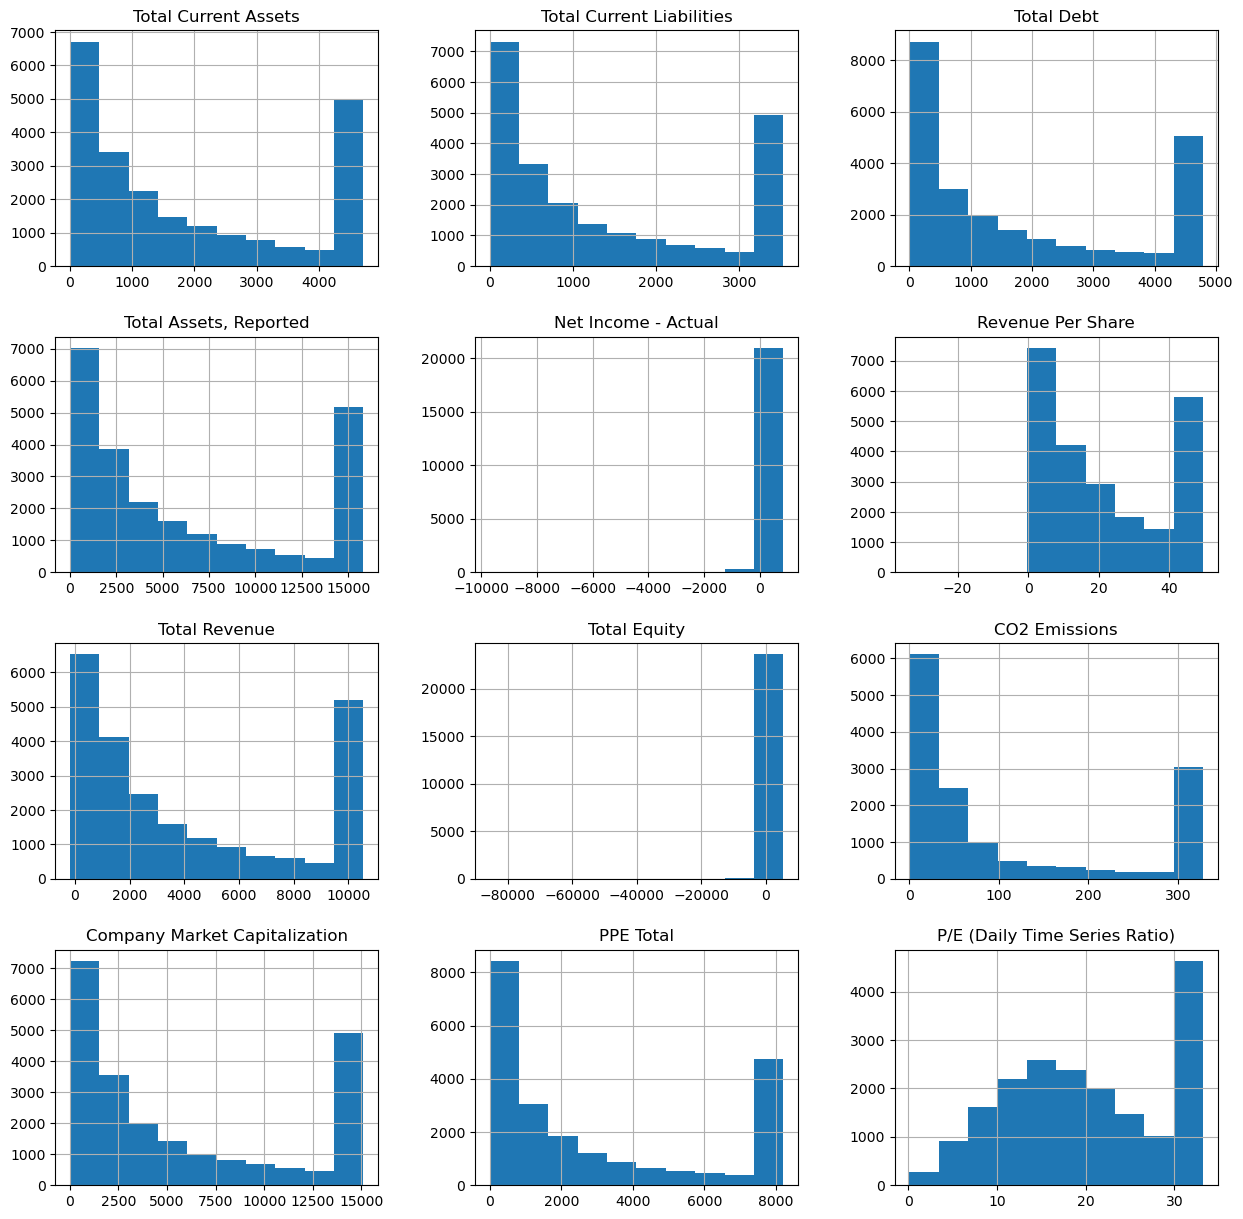

In [18]:
df_firm[columns].hist( figsize=(15,15))

plt.show()

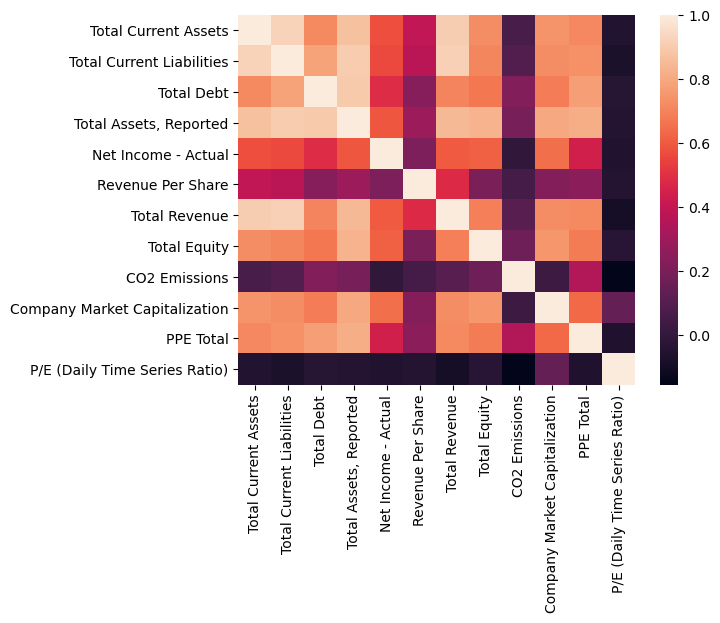

<Figure size 2000x2000 with 0 Axes>

In [19]:
cormat = df_firm[columns].corr()
sns.heatmap(cormat)
plt.figure(figsize=(20,20))
plt.show()

In [20]:
display(df_return)

,Unnamed: 0,Date,INTU.O,HL,GILG.DE,APH,SGH.O,PMAG.S,RTX,SOLARb.CO,...,XYL,SCHN.PA,PRGO.K,TRELb.ST,SRG.MI,LOG.MC,GEO.MI,NRG,MYTr.AT,TEMN.S
0,0,2000-01-31,0.625652,-12.000000,11.671470,1.971831,0.000000,0.000000,-18.557692,0.000000,...,0.000000,-6.991661,7.421875,-1.045752e+01,0.000000,0.000000,0.000000,0.000000,-23.040752,0.000000
1,1,2000-02-29,-12.953368,4.545455,-2.580645,17.771639,0.000000,0.000000,-3.408844,-2.777778,...,0.000000,-7.586207,-14.545455,-1.021898e+01,0.000000,0.000000,0.000000,0.000000,-18.533605,0.000000
2,2,2000-03-31,3.571429,-4.347826,3.973510,27.912432,0.000000,0.000000,24.049080,3.428571,...,0.000000,-0.447761,3.404255,-8.130081e-01,0.000000,0.000000,0.000000,0.000000,1.125000,0.000000
3,3,2000-04-30,-33.908046,-9.090909,5.732484,24.694377,0.000000,0.000000,-1.582591,2.287293,...,0.000000,7.946027,-25.102881,3.516658e+00,0.000000,0.000000,0.000000,0.000000,-20.519159,0.000000
4,4,2000-05-31,0.869565,-15.000000,11.862429,-28.235294,0.000000,0.000000,-2.515897,2.040297,...,0.000000,-0.833333,5.494505,-4.023120e-10,0.000000,0.000000,0.000000,0.000000,19.284603,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,256,2021-05-31,6.533870,52.482322,1.151544,-0.118800,2.708559,-0.566869,7.209063,0.643364,...,7.006795,-0.789495,10.833534,-3.263826e+00,2.713675,3.583815,35.353535,-10.245673,-0.710136,3.924577
257,257,2021-06-30,11.633150,-17.333333,1.571947,1.929803,0.590717,0.124224,-3.832713,-3.024911,...,1.557738,2.534776,-0.124844,-6.888472e+00,4.520530,-3.236607,-8.789386,25.349922,2.218585,7.331166
258,258,2021-07-31,8.246218,-10.080645,-0.595238,5.964040,-1.761745,-1.240695,1.922401,11.559633,...,4.909970,6.496834,4.754635,7.045798e+00,4.697436,4.786621,5.636364,3.138958,1.955671,-3.095559
259,259,2021-08-31,6.819254,-7.884395,1.077844,5.711133,3.458582,3.015075,-1.922223,13.486842,...,8.535962,7.077141,-14.740787,-1.410437e+00,-1.959248,3.472172,-3.270224,10.741998,1.662404,0.972222


In [22]:
df_yearlyreturndata = pd.read_csv("yearly_return.csv")

display(df_yearlyreturndata)

,Unnamed: 0,RIC,Date,returns_monthly
0,0,0973.HK,2009,0.000000
1,1,0973.HK,2010,46.444961
2,2,0973.HK,2011,-23.899519
3,3,0973.HK,2012,51.000108
4,4,0973.HK,2013,-34.498730
...,...,...,...,...
24474,24474,ZV.MI,2017,44.711599
24475,24475,ZV.MI,2018,8.617321
24476,24476,ZV.MI,2019,48.959964
24477,24477,ZV.MI,2020,14.352528
